# Housing Prices Predictions
Matthew Dalby & Duc Nguyen

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

## Importing data
Our dataset is titled "House Prices - Advanced Regression Techniques" and comes from kaggle.

In [2]:
train_set = pd.read_csv("train.csv")

## Feature selection

### Correlation matrix:


Text(0.5, 1.0, 'Correlation Matrix')

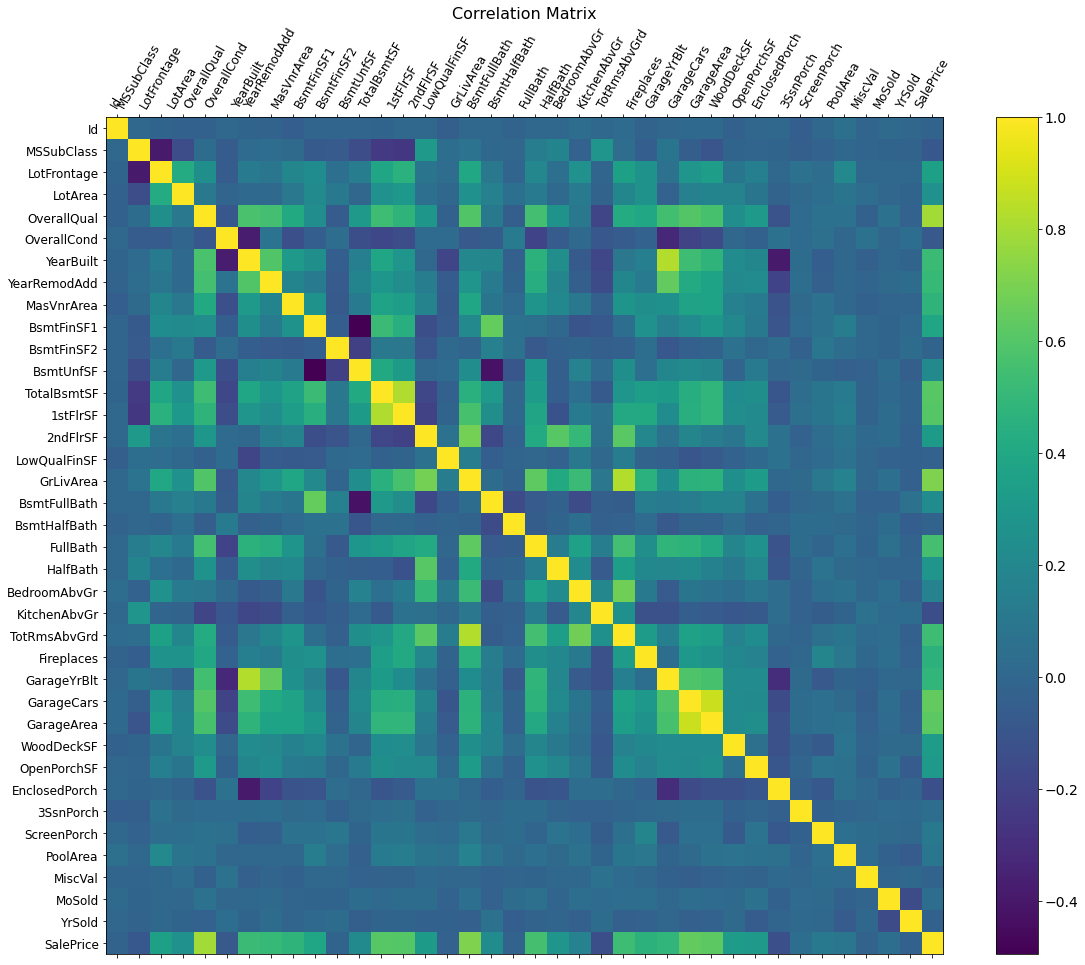

In [3]:
#Make and print corerlation matrix using matplotlib

from matplotlib import pyplot as plt

correlation = train_set.corr()

f = plt.figure(figsize=(19, 15))
plt.matshow(correlation, fignum=f.number)
plt.xticks(range(train_set.select_dtypes(['number']).shape[1]), train_set.select_dtypes(['number']).columns, fontsize=12, rotation=60)
plt.yticks(range(train_set.select_dtypes(['number']).shape[1]), train_set.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [4]:
#Select features with highest correlation to SalePrice (Top 10 and bottom 10):
features = correlation["SalePrice"]
print("Top 10 Positively correlated:\n", features.sort_values(ascending=True)[-11:-1])
print("\nTop 10 negatively correlated:\n",features.sort_values(ascending=True)[:10])

Top 10 Positively correlated:
 YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
Name: SalePrice, dtype: float64

Top 10 negatively correlated:
 KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64


OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt and YearRemodAdd are the top 10 features.

In [5]:
#Select features most highly correlated to the sale price.
X = train_set.loc[:, ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea"]].values
y = train_set.iloc[:, -1].values

In [6]:
#Create Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression


linear_regression_model = LinearRegression().fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

linear_regressor_accuracy = mean_absolute_percentage_error(y_test, y_pred)
print(linear_regressor_accuracy)

rmspe_linear_regressor = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_linear_regressor)

0.12039723633358751
16.899982067969944


Our first linear model has an error of ~12% using Mean Absolute Percentage Error.
With Root Mean Squared Error, it has ~17%

## Polynomial Regression Model

In [8]:
# Polynomial Regression Model of degree 2 and of degree 3
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)

X_polytrain = poly_reg.fit_transform(X_train)
X_polytest = poly_reg.fit_transform(X_test)


lin_reg2 = LinearRegression()

lin_reg2.fit(X_polytrain,y_train)
y_pred = lin_reg2.predict(X_polytest)

poly_regression_accuracy_deg2 = mean_absolute_percentage_error(y_test, y_pred)
print(poly_regression_accuracy_deg2)

rmspe_poly_regressor_deg2 = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_poly_regressor_deg2)

0.10838848838223347
15.414448343016515


In [9]:
poly_reg=PolynomialFeatures(degree=3)

X_polytrain = poly_reg.fit_transform(X_train)
X_polytest = poly_reg.fit_transform(X_test)


lin_reg2 = LinearRegression()

lin_reg2.fit(X_polytrain,y_train)
y_pred = lin_reg2.predict(X_polytest)

poly_regression_accuracy_deg3 = mean_absolute_percentage_error(y_test, y_pred)
print(poly_regression_accuracy_deg3)

rmspe_poly_regressor_deg3 = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_poly_regressor_deg3)

0.21491078944661976
36.76597139688017


Our polynomial regression model of degree 2 was twice as accurate as our model of degree 3.
With 10% vs 21% error rates.

If we are using Root Mean Squared Error, it has around 15% and 37% error rate.

## Random Forest Regression

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

random_forest_accuracy = mean_absolute_percentage_error(y_test, y_pred)
print(random_forest_accuracy)

rmspe_random_forrest = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_random_forrest)

0.0871907963448308
12.318421952586217


Our random forest model has an error of ~8%.

# Other Linear Models
Huber regression, RANSACRegressor, and Theil Sen Regression

In [11]:
#Huber Regression
from sklearn.linear_model import HuberRegressor

huber_regressor = HuberRegressor(max_iter=1000).fit(X_train,y_train)

y_pred = huber_regressor.predict(X_test)
huber_regressor_accuracy = mean_absolute_percentage_error(y_test, y_pred)
print(huber_regressor_accuracy)

rmspe_huber = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_huber)

0.1238838189738388
17.18633954640888


In [12]:
#RANSACRegressor
from sklearn.linear_model import RANSACRegressor

RANSAC_regressor = RANSACRegressor().fit(X_train,y_train)

y_pred = RANSAC_regressor.predict(X_test)
RANSAC_regressor_accuracy = mean_absolute_percentage_error(y_test, y_pred)
print(RANSAC_regressor_accuracy)

rmspe_RANSAC = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_RANSAC)

0.11675945293579068
16.359272490293385


In [13]:
#Theil Sen Regression
from sklearn.linear_model import TheilSenRegressor
Theil_regressor = TheilSenRegressor().fit(X_train,y_train)

y_pred = Theil_regressor.predict(X_test)
Theil_regressor_accuracy = mean_absolute_percentage_error(y_test, y_pred)
print(Theil_regressor_accuracy)

rmspe_Theil = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print(rmspe_Theil)

0.1150085745633269
16.85988709599219


# Results


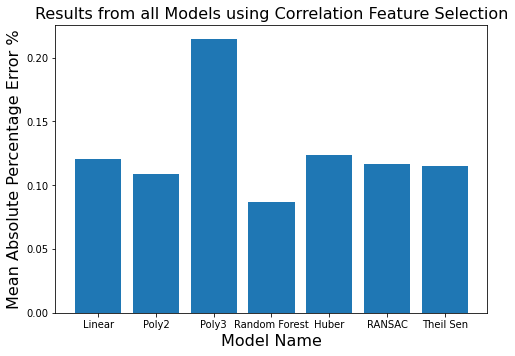

In [14]:
#Print accuracy of all models as bar chart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Linear', 'Poly2', 'Poly3', 'Random Forest', 'Huber', 'RANSAC', 'Theil Sen']
acc = [linear_regressor_accuracy,poly_regression_accuracy_deg2,poly_regression_accuracy_deg3,random_forest_accuracy,huber_regressor_accuracy
,RANSAC_regressor_accuracy,Theil_regressor_accuracy]
ax.bar(model,acc)

ax.set_ylabel('Mean Absolute Percentage Error %',fontsize=16)
ax.set_xlabel('Model Name',fontsize=16)
ax.set_title('Results from all Models using Correlation Feature Selection',fontsize=16)
plt.show()

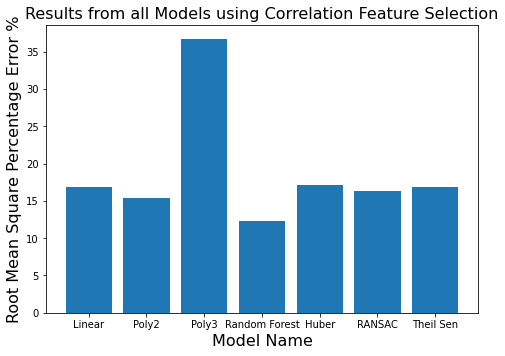

In [15]:
#Print accuracy of all models as bar chart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Linear', 'Poly2', 'Poly3', 'Random Forest', 'Huber', 'RANSAC', 'Theil Sen']
acc = [rmspe_linear_regressor,rmspe_poly_regressor_deg2,rmspe_poly_regressor_deg3,rmspe_random_forrest,rmspe_huber
,rmspe_RANSAC,rmspe_Theil]
ax.bar(model,acc)

ax.set_ylabel('Root Mean Square Percentage Error %',fontsize=16)
ax.set_xlabel('Model Name',fontsize=16)
ax.set_title('Results from all Models using Correlation Feature Selection',fontsize=16)
plt.show()